In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Visualization

<Figure size 2000x1000 with 0 Axes>

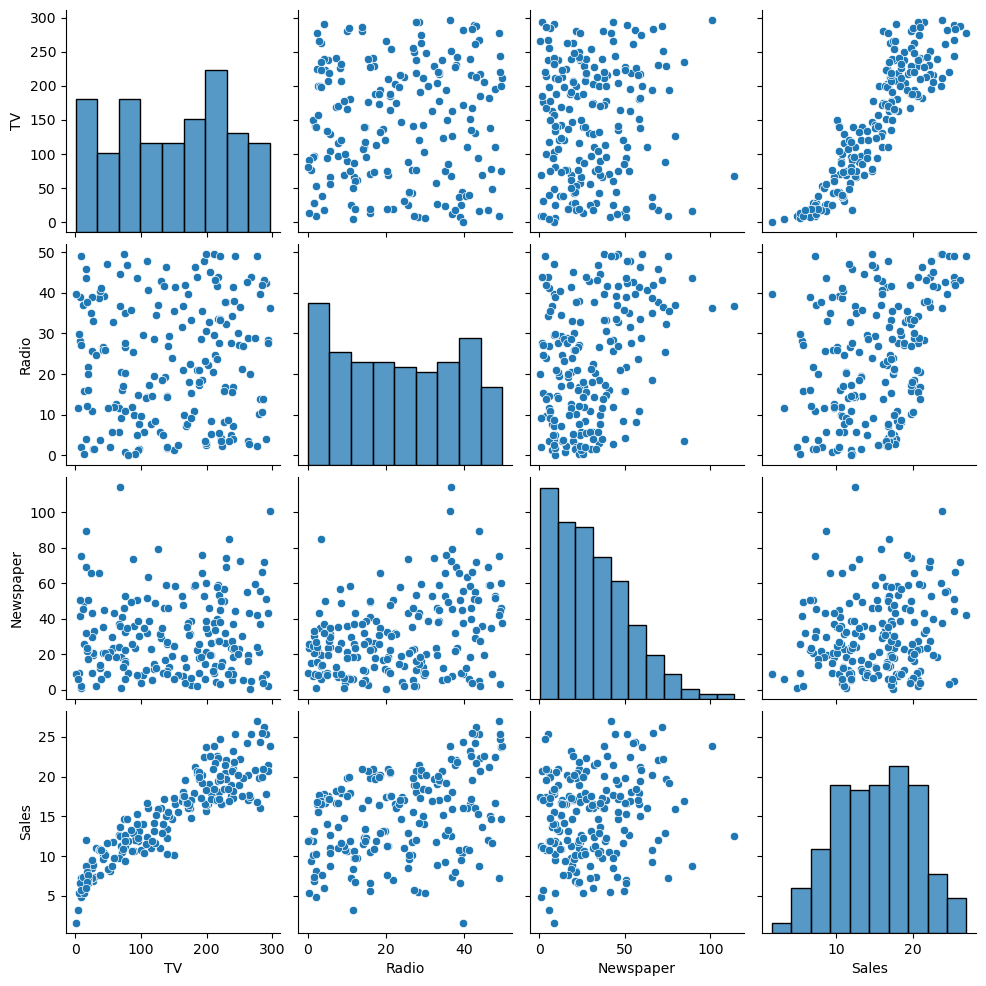

In [4]:
plt.figure(figsize=(10,5),dpi=200)
sns.pairplot(data=df,kind='scatter',diag_kind='hist')

<Axes: xlabel='TV', ylabel='Sales'>

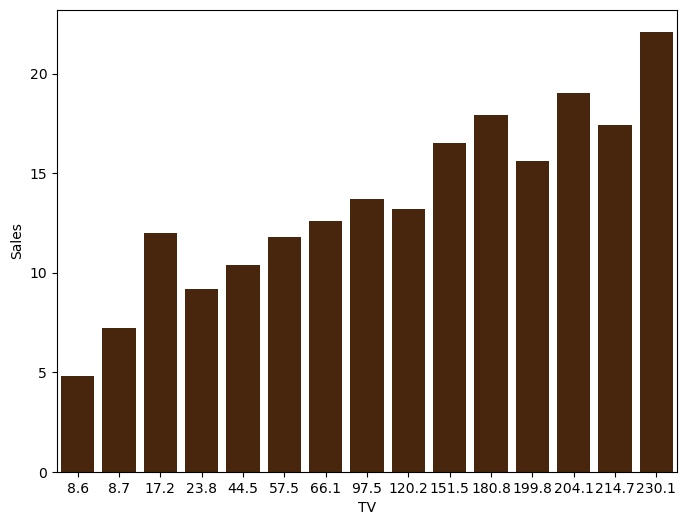

In [5]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=df['TV'].head(15),y=df['Sales'].head(15), n_boot=100,color='#502504')

<Axes: xlabel='Radio', ylabel='Sales'>

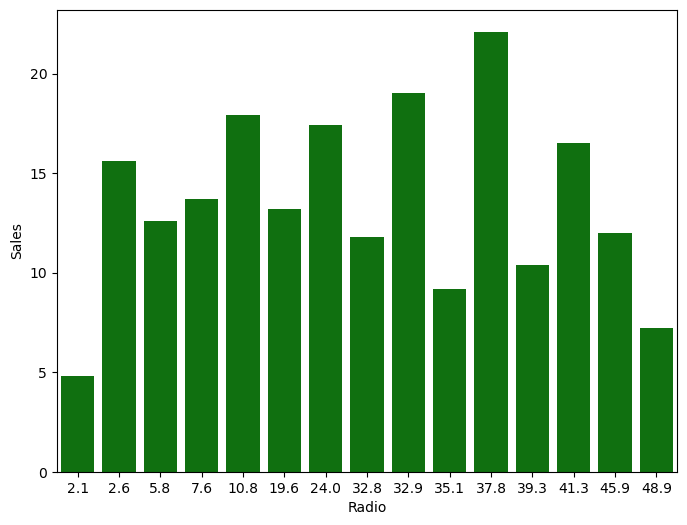

In [6]:
plt.figure(figsize=(8,6),dpi=100)
sns.barplot(x=df['Radio'].head(15),y=df['Sales'].head(15), n_boot=100,color='green')

# Separating  Features and Labels

In [7]:
x=df.drop('Sales',axis=1)
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [8]:
y=df.Sales
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

# Train test Splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

# Model Fitting/Training 

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [14]:
y_preds=model.predict(x_test)

In [15]:
Result=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_preds})
Result.head()


,Actual Values,Predicted Values
37,14.7,13.928410
109,19.8,21.502341
31,11.9,12.532115
89,16.7,15.695882
66,11.0,8.831509


In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
MAE=mean_absolute_error(y_test,y_preds)
print('Mean absolute error',MAE)

Mean absolute error 1.3673747989546936


In [18]:
RMSE=np.sqrt(mean_squared_error(y_test,y_preds))
print('Root mean sqaured error',RMSE)

Root mean sqaured error 1.6982144958306455


# Residual plot
it's plot between actual minus predicted values 

In [19]:
residual=y_test-y_preds

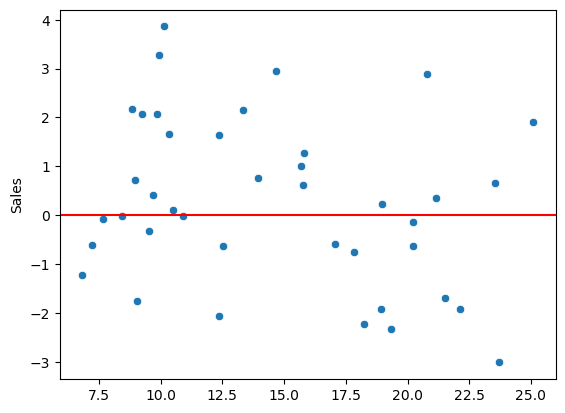

In [20]:
sns.scatterplot(x=y_preds,y=residual)
plt.axhline(y=0,color='red')

# Random Scatter
In a good residual plot, the points should be randomly scattered around the horizontal zero line (y = 0). This randomness suggests that the model's predictions have captured the majority of the variation in the data, and there are no obvious systematic patterns left in the residuals.

# No Clear Trend
There should be no clear trend or structure in the residual plot. A good residual plot should not show any curvature, bowing, or other systematic deviations from the horizontal line. A clear trend might suggest that your model doesn't capture non-linear relationships in the data.

# Conclusion 

we concluded from MAE,Residual plot and RMSE The model is performing good for overall dataset 

# Model Deployment

In [21]:
final_model=LinearRegression()

In [22]:
final_model.fit(x,y)

LinearRegression()

In [23]:
final_model.coef_

array([0.05444578, 0.10700123, 0.00033566])

These coefficient are actuall Beta values for features like TV ,Radio and Newspaper
these implies if we increase one unit(spent) of say TV( fixing Radio and Newspaper) it would increase 0.0544 sales and so with the Radio and Newspaper 

In [24]:
y_hat=final_model.predict(x)

# Visualizing Predicted and actual values

Text(0.5, 1.0, 'Newspaper spend')

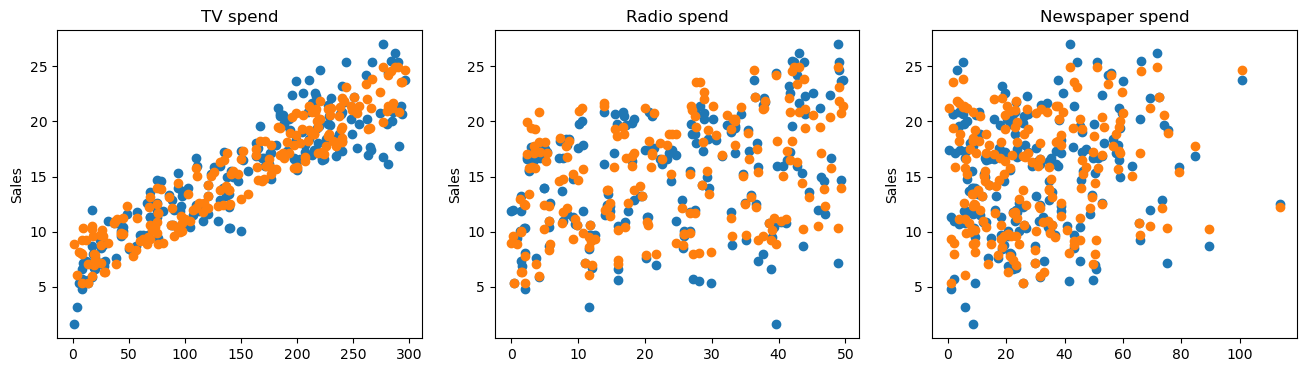

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,4))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].plot(df['TV'],y_hat,'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV spend')

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].plot(df['Radio'],y_hat,'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio spend')

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].plot(df['Newspaper'],y_hat,'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper spend')

# Saving the model

In [26]:
import pickle 

In [27]:
pickle.dump(final_model,open('sales.pkl','wb'))

In [28]:
from joblib import dump,load

In [29]:
dump(final_model,'final sales model.joblib')

['final sales model.joblib']

In [30]:
load_model=load('final sales model.joblib')

In [31]:
ads=[[15000,1220,101]]

In [32]:
load_model.predict(ads)

C:\Users\Sam\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([951.88722904])

# Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
#creating polynomial feature
feature_converter=PolynomialFeatures(degree=2,include_bias=False)

In [35]:
poly_features=feature_converter.fit_transform(x)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.2,random_state=101)

In [37]:
model.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred=model.predict(x_test)

In [39]:
Result=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
Result.head()

,Actual Values,Predicted Values
37,14.7,13.902170
109,19.8,20.938272
31,11.9,13.114038
89,16.7,16.443856
66,11.0,7.651586


In [40]:
MAE=mean_absolute_error(y_test,y_pred)
print('Mean absolute error',MAE)

Mean absolute error 1.1863276418267414


In [41]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root mean sqaured error',RMSE)

Root mean sqaured error 1.5014484723318393


# Choosing degree of polynomial

In [42]:
train_error=[]
test_error=[]

for d in range(1,8):
    feature_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=feature_converter.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    y_train_pred=model.predict(x_train)
    train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pred))
    train_error.append(train_rmse)
    test_error.append(test_rmse)
    

In [43]:
train_error

[1.6320782925717718,
 1.308115821073407,
 1.2513012489134374,
 1.0956705812612533,
 0.9120298121845846,
 0.7891922442943209,
 10.61827885889098]

In [44]:
test_error

[1.6936855180040058,
 1.459583475557491,
 1.4319246006910036,
 1.3944536187842984,
 3.235064278824799,
 44.209808724910204,
 3397.1131983622367]

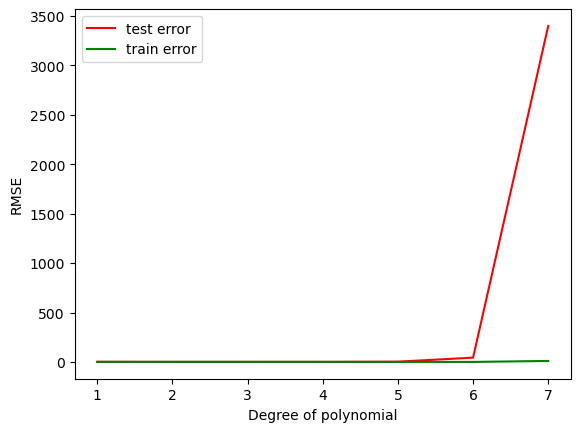

In [45]:
plt.plot(range(1,8),test_error,color='red',label='test error')
plt.plot(range(1,8),train_error,color='green',label='train error')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.show()
